In [2]:
import os
import sys

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\91934\OneDrive\Documents\EDA_Dataset\Day-4CE-1\DA314_S4_OrderDetails_Data_Concept.csv")
df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,items_ordered,payment_method,order_status,name_user,gender,city_user,name_restaurant,city_restaurant,avg_cost_for_two,rating,delivery_pertner_pay,delivery_time_min
0,ORD0001,USR002,RST007,01/04/2024,2188,"Fried Rice, Masala Dosa, Hakka Noodles",Credit Card,Completed,Damini Lal,Female,Kolkata,Fusion Flavors #7,Kolkata,260,3.1,153.16,60.0
1,ORD1933,USR080,RST007,26/03/2025,846,"Chicken Biryani, Dal Makhani, Mutton Rogan Josh",Wallet,Completed,Ela Dubey,Female,Kolkata,Fusion Flavors #7,Kolkata,260,3.1,59.22,50.0
2,ORD1946,USR038,RST007,28/03/2025,1431,"Chole Bhature, Aloo Tikki, Samosa",Cash on Delivery,Completed,Riaan Thaker,Male,Kolkata,Fusion Flavors #7,Kolkata,260,3.1,100.17,80.0
3,ORD1265,USR102,RST007,21/11/2024,1231,"Butter Naan, Chicken Curry, Aloo Tikki, Masala...",Wallet,Completed,Vihaan Som,Male,Kolkata,Fusion Flavors #7,Kolkata,260,3.1,86.17,60.0
4,ORD1694,USR124,RST007,09/02/2025,523,"Butter Naan, Chole Bhature, Pav Bhaji",UPI,Completed,Riaan Kata,Male,Kolkata,Fusion Flavors #7,Kolkata,260,3.1,36.61,100.0


payment_method
Cash on Delivery    514
UPI                 511
Wallet              495
Credit Card         448
Name: count, dtype: int64


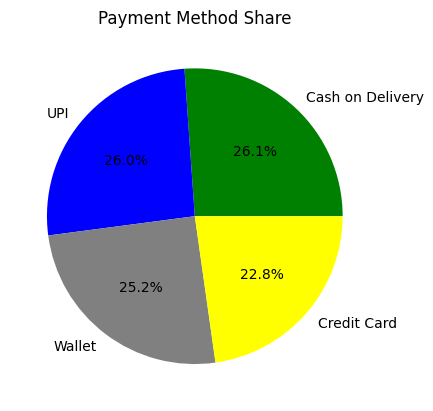

In [5]:
color = ["green","blue","grey","yellow"]
payment = df['payment_method'].value_counts()
print(payment)
# Create the pie chart
plt.pie(payment.values, labels=payment.index, autopct="%1.1f%%", colors=color)
plt.title("Payment Method Share")
plt.show()

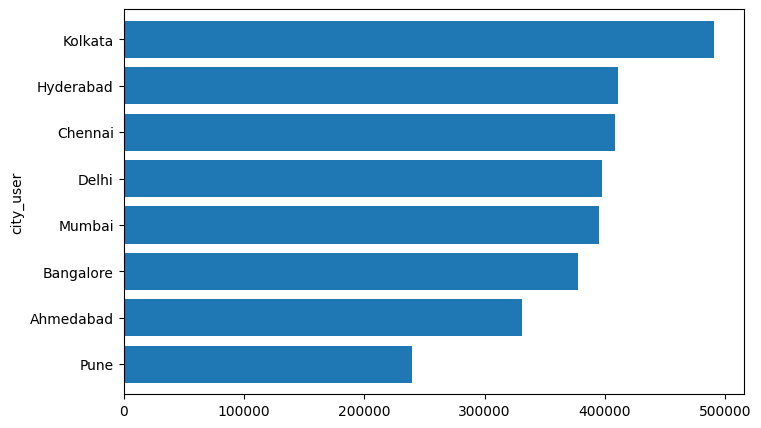

In [6]:
city_grouping = df.groupby('city_user')['total_amount'].sum()
city_grouping.sort_values(ascending = True).plot(kind = 'barh', figsize=(8,5), width = 0.8)
plt.show()

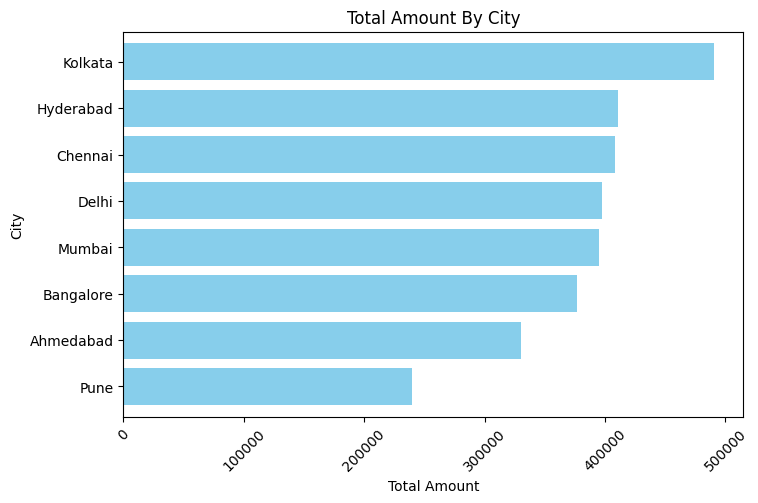

In [7]:
plt.title("Total Amount By City")
city_grouping.sort_values(ascending = True).plot(kind = 'barh', figsize=(8,5), width = 0.8, color = "Skyblue")
plt.xlabel("Total Amount")
plt.ylabel("City")
plt.xticks(rotation = 45)
plt.show()

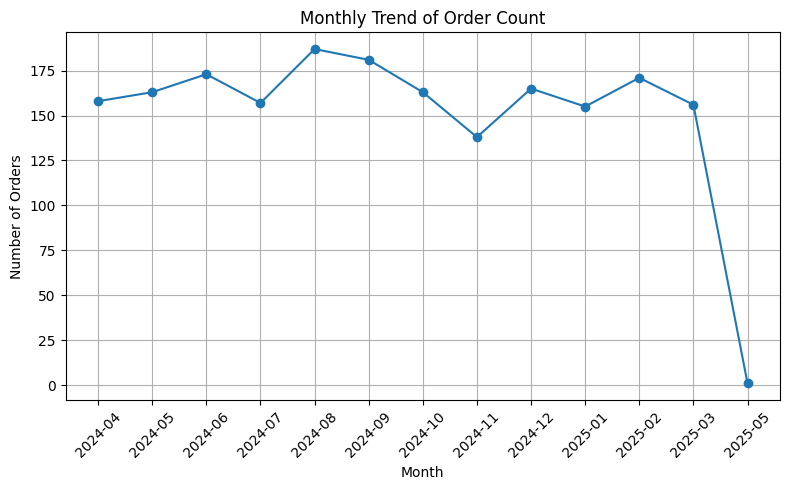

In [8]:

df['order_date'] = pd.to_datetime(df['order_date'], format = 'mixed', dayfirst = True)
df['Month'] = df['order_date'].dt.to_period('M').astype(str)
monthly_orders = df.groupby('Month').size().reset_index(name = 'Order_Count')
plt.figure(figsize = (8,5))
plt.plot(monthly_orders['Month'], monthly_orders['Order_Count'], marker='o')
plt.title("Monthly Trend of Order Count")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

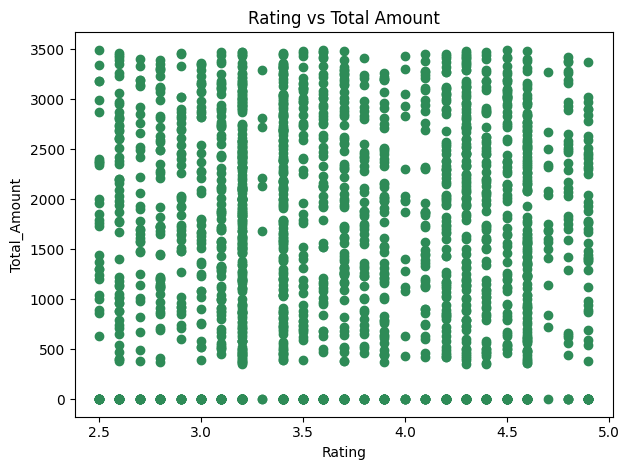

In [9]:
plt.title("Rating vs Total Amount")
plt.scatter(x = 'rating', y = 'total_amount', data = df, color = "seagreen")
plt.xlabel("Rating")
plt.ylabel("Total_Amount")
plt.tight_layout()
plt.show()

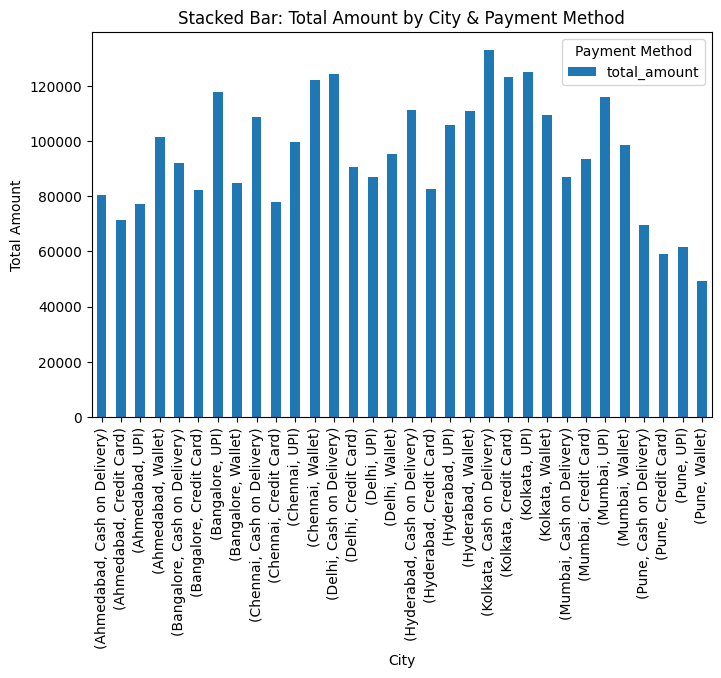

In [27]:
city_payment = df.groupby(['city_restaurant','payment_method'])['total_amount'].sum()
city_payment.plot(kind = 'bar', stacked = False, figsize = (8,5))
plt.title("Stacked Bar: Total Amount by City & Payment Method")
plt.xlabel("City")
plt.ylabel("Total Amount")
plt.legend(title = 'Payment Method')
plt.show()

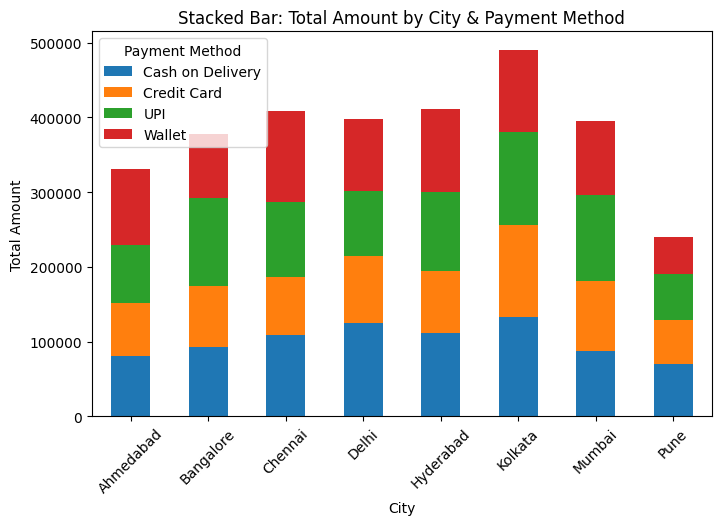

In [11]:
city_payment = df.groupby(['city_restaurant','payment_method'])['total_amount'].sum().unstack(fill_value = 0)
city_payment.plot(kind = 'bar', stacked = True, figsize = (8,5))
plt.title("Stacked Bar: Total Amount by City & Payment Method")
plt.xlabel("City")
plt.ylabel("Total Amount")
plt.xticks(rotation = 45)
plt.legend(title = 'Payment Method')
plt.show()

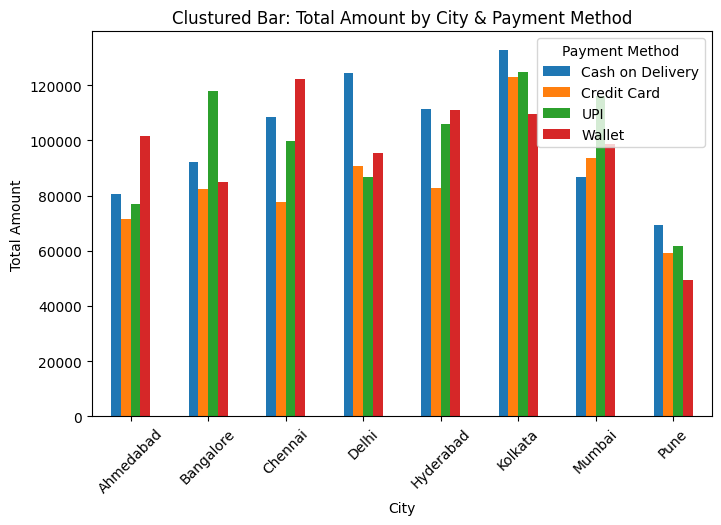

In [12]:
city_payment = df.groupby(['city_restaurant','payment_method'])['total_amount'].sum().unstack(fill_value = 0)
city_payment.plot(kind = 'bar', stacked = False, figsize = (8,5))
plt.title("Clustured Bar: Total Amount by City & Payment Method")
plt.xlabel("City")
plt.ylabel("Total Amount")
plt.xticks(rotation = 45)
plt.legend(title = 'Payment Method')
plt.show()

Text(0, 0.5, 'Frequency')

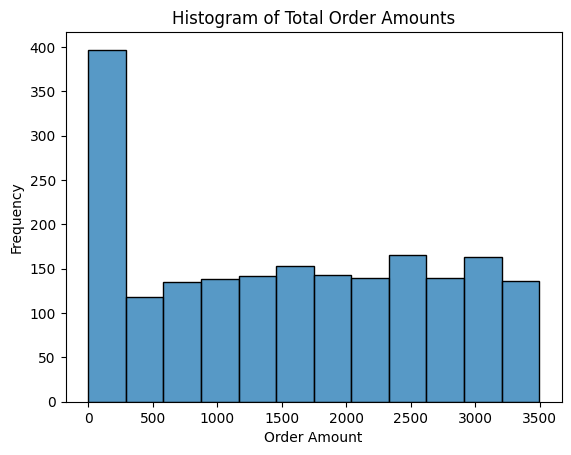

In [29]:
sns.histplot(df, x = "total_amount")
plt.title("Histogram of Total Order Amounts")
plt.xlabel("Order Amount")
plt.ylabel("Frequency")

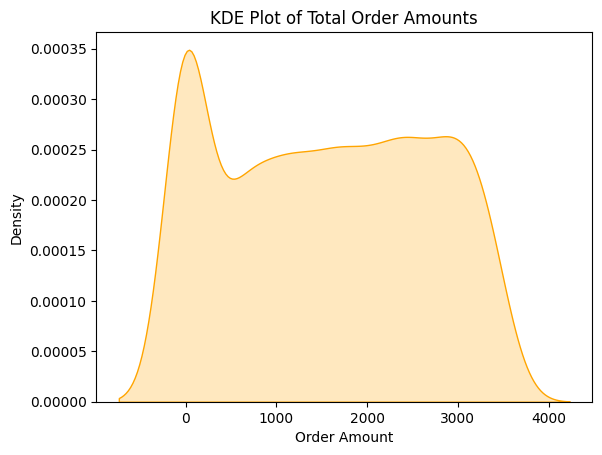

In [32]:
sns.kdeplot(data = df, x = "total_amount", fill = True, color = "orange") #or shede = True
plt.title("KDE Plot of Total Order Amounts")
plt.xlabel("Order Amount")
plt.ylabel("Density")
plt.show()

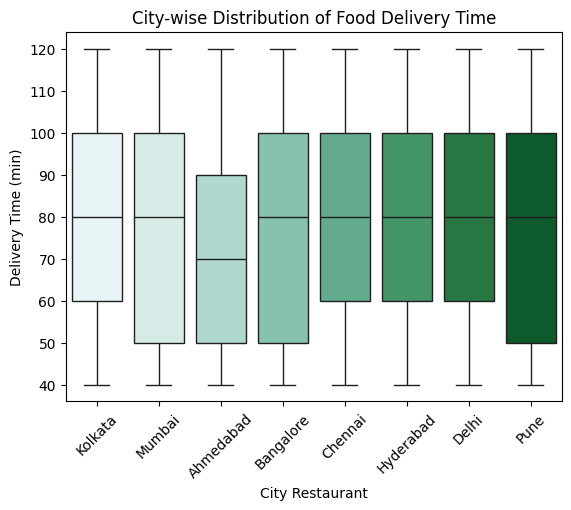

In [15]:
sns.boxplot(data = df, x = "city_restaurant", y = "delivery_time_min", palette="BuGn", hue = "city_restaurant")
plt.title("City-wise Distribution of Food Delivery Time")
plt.xlabel("City Restaurant")
plt.ylabel("Delivery Time (min)")
plt.xticks(rotation = 45)
plt.show()

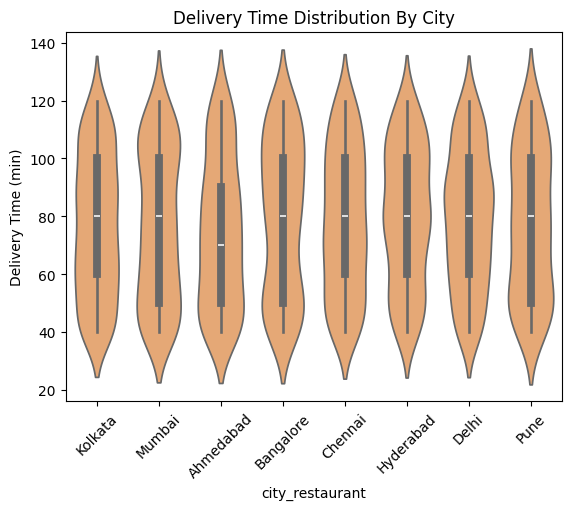

In [16]:
sns.violinplot(data = df, x = "city_restaurant", y = "delivery_time_min", color = "#F8A663")
plt.title("Delivery Time Distribution By City")
plt.xlabel("city_restaurant")
plt.ylabel("Delivery Time (min)")
plt.xticks(rotation = 45)
plt.show()

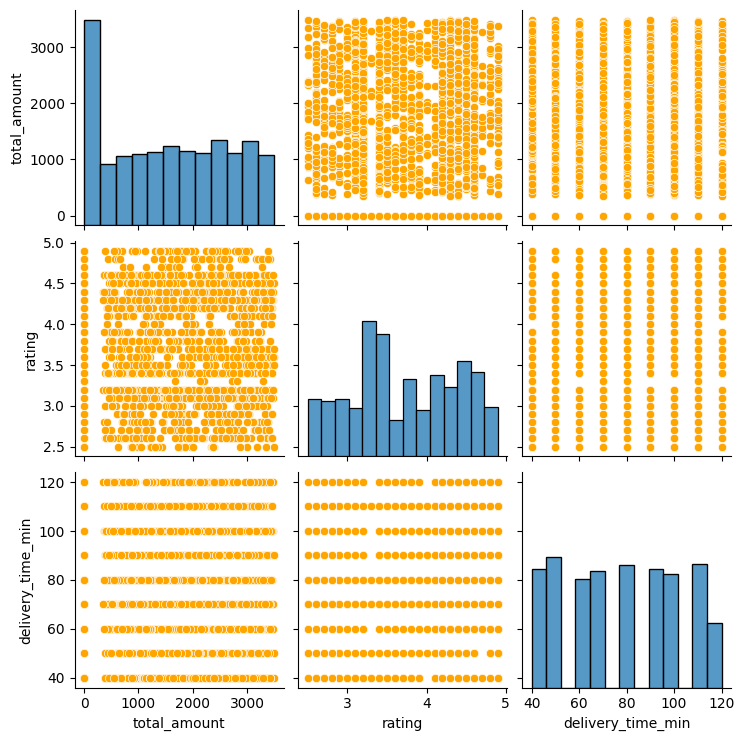

In [17]:

sns.pairplot(data = df[["total_amount","rating","delivery_time_min"]], plot_kws = {"color":"orange"})
plt.show()

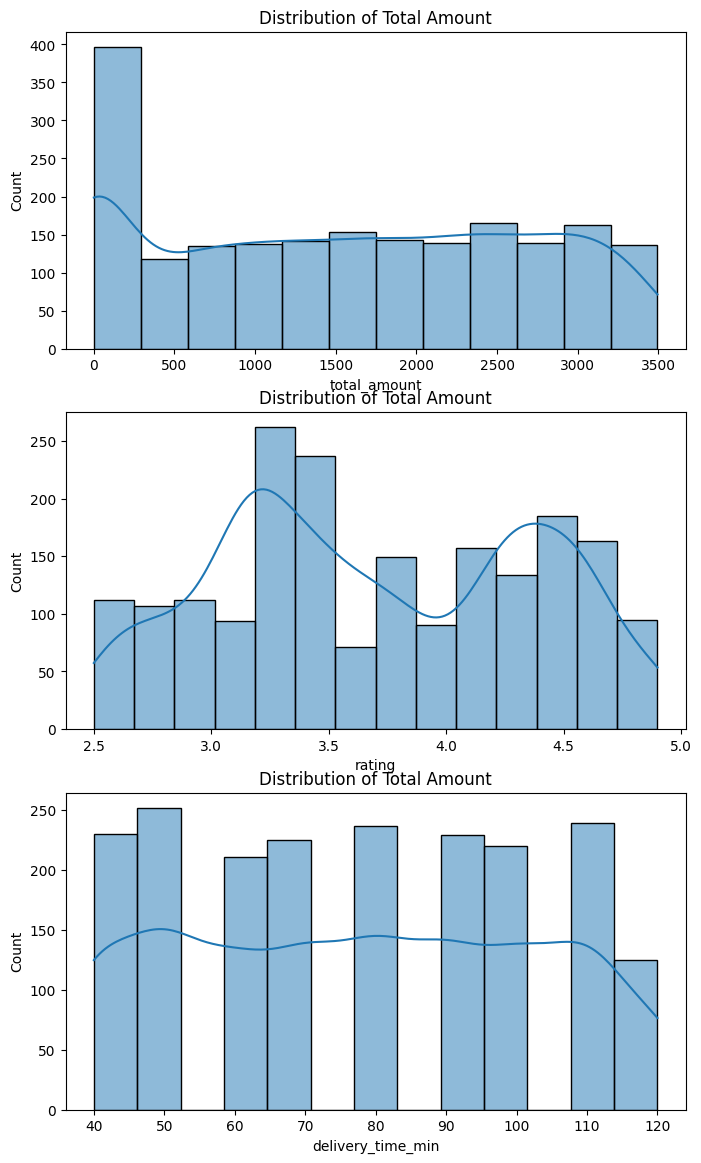

In [26]:
plt.figure(figsize = (8,14))
plt.subplot(3, 1, 1)
sns.histplot(data = df, x = "total_amount", kde = True)
plt.title("Distribution of Total Amount")
plt.xlabel("total_amount")
plt.ylabel("Count")
plt.subplot(3, 1, 2)
sns.histplot(data = df, x = "rating", kde = True)
plt.title("Distribution of Total Amount")
plt.xlabel("rating")
plt.ylabel("Count")
plt.subplot(3, 1, 3)
sns.histplot(data = df, x = "delivery_time_min", kde = True)
plt.title("Distribution of Total Amount")
plt.xlabel("delivery_time_min")
plt.ylabel("Count")
plt.show()
